<a href="https://colab.research.google.com/github/suryayesu/suryayesu/blob/main/ML_Project3_R1_Final(Income_Qualification).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***DESCRIPTION***

Identify the level of income qualification needed for the families in Latin America.

# *Problem Statement Scenario:*
Many social programs have a hard time ensuring that the right people are given enough aid. It’s tricky when a program focuses on the poorest segment of the population. This segment of the population can’t provide the necessary income and expense records to prove that they qualify.

In Latin America, a popular method called Proxy Means Test (PMT) uses an algorithm to verify income qualification. With PMT, agencies use a model that considers a family’s observable household attributes like the material of their walls and ceiling or the assets found in their homes to
classify them and predict their level of need.

While this is an improvement, accuracy remains a problem as the region’s population grows and poverty declines.

The Inter-American Development Bank (IDB)believes that new methods beyond traditional econometrics, based on a dataset of Costa Rican household characteristics, might help improve PMT’s performance.

# *Following actions should be performed:*

Identify the output variable.

Understand the type of data.

Check if there are any biases in your dataset.

Check whether all members of the house have the same poverty level.

Check if there is a house without a family head.

Set poverty level of the members and the head of the house within a family.

Count how many null values are existing in columns.

Remove null value rows of the target variable.

Predict the accuracy using random forest classifier.

Check the accuracy using random forest with cross validation.

# ***Importing the CSV Files***

In [1]:
from google.colab import files
uploaded = files.upload()

Saving test_income_ds.csv to test_income_ds.csv
Saving train_income_ds.csv to train_income_ds.csv


***# Importing Libraries***

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [3]:
train_income_df = pd.read_csv('train_income_ds.csv')
test_income_df = pd.read_csv('test_income_ds.csv')

In [4]:
train_income_df.shape,test_income_df.shape

((9557, 143), (23856, 142))

In [5]:
train_income_df.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,...,100,1849,1,100,0,1.000000,0.0,100.0,1849,4
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,...,144,4489,1,144,0,1.000000,64.0,144.0,4489,4
2,ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,...,121,8464,1,0,0,0.250000,64.0,121.0,8464,4
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,...,81,289,16,121,4,1.777778,1.0,121.0,289,4
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,...,121,1369,16,121,4,1.777778,1.0,121.0,1369,4


In [6]:
test_income_df.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq
0,ID_2f6873615,NaN,0,5,0,1,1,0,NaN,1,...,4,0,16,9,0,1,2.25,0.25,272.25,16
1,ID_1c78846d2,NaN,0,5,0,1,1,0,NaN,1,...,41,256,1681,9,0,1,2.25,0.25,272.25,1681
2,ID_e5442cf6a,NaN,0,5,0,1,1,0,NaN,1,...,41,289,1681,9,0,1,2.25,0.25,272.25,1681
3,ID_a8db26a79,NaN,0,14,0,1,1,1,1.0,0,...,59,256,3481,1,256,0,1.00,0.00,256.00,3481
4,ID_a62966799,175000.0,0,4,0,1,1,1,1.0,0,...,18,121,324,1,0,1,0.25,64.00,NaN,324


**The test_income_df doesn't have target Variable,which we have to predict**

In [ ]:
# train_income_df.set_index('Id',inplace=True)
# test_income_df.set_index('Id',inplace=True)

*# Using descibe() on dataframe and studying the Statistics and applying transpose function(T) to convert rows into columns for viewing all the data of 143 columns *

In [7]:
train_income_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9557 entries, 0 to 9556
Columns: 143 entries, Id to Target
dtypes: float64(8), int64(130), object(5)
memory usage: 10.4+ MB


# **Importatnt Data fields:**
**Id** - a unique identifier for each row.

**Target** - the target is an ordinal variable indicating groups of income levels.

1 = extreme poverty
2 = moderate poverty
3 = vulnerable households
4 = non vulnerable households

**idhogar** - this is a unique identifier for each household. This can be used to create household-wide features, etc. All rows in a given household will have a matching value for this identifier.

**parentesco1** - indicates if this person is the head of the household.

There are 5 object datatype columns,8 float64 datatypes and 130 int64 datatype columns

In [8]:
train_income_df.select_dtypes('object').head()
test_income_df.select_dtypes('object').head()

,Id,idhogar,dependency,edjefe,edjefa
0,ID_2f6873615,72958b30c,.5,no,17
1,ID_1c78846d2,72958b30c,.5,no,17
2,ID_e5442cf6a,72958b30c,.5,no,17
3,ID_a8db26a79,5b598fbc9,no,16,no
4,ID_a62966799,1e2fc704e,8,no,11


**Let us understand object dtypes columns:**

**1.dependency** = Dependency rate, calculated = (number of members of the household younger than 19 or older than 64)/(number of member of household between 19 and 64) 

**2.edjefe **= years of education of male head of household, based on the interaction of escolari (years of education), head of household and gender, yes=1 and no=0

**3. edjefa** = years of education of female head of household, based on the interaction of escolari (years of education), head of household and gender, yes=1 and no=0

For these three columns, we can replace “yes” = 1 and “no” = 0. We can clean these columns using a replace() function and convert to floats.

In [9]:
map = {'yes' : 1 , 'no' : 0}
for df in [train_income_df, test_income_df]:
    df['dependency'] =df['dependency'].replace(map).astype(np.float64)
    df['edjefe'] =df['edjefe'].replace(map).astype(np.float64)
    df['edjefa'] =df['edjefa'].replace(map).astype(np.float64)
    
train_income_df[['dependency','edjefe','edjefa']].describe()

,dependency,edjefe,edjefa
count,9557.000000,9557.000000,9557.000000
mean,1.149550,5.096788,2.896830
std,1.605993,5.246513,4.612056
min,0.000000,0.000000,0.000000
25%,0.333333,0.000000,0.000000
50%,0.666667,6.000000,0.000000
75%,1.333333,9.000000,6.000000
max,8.000000,21.000000,21.000000


In [10]:
test_income_df[['dependency','edjefe','edjefa']].describe()

,dependency,edjefe,edjefa
count,23856.000000,23856.000000,23856.000000
mean,1.181327,5.199824,2.800176
std,1.666209,5.200980,4.603592
min,0.000000,0.000000,0.000000
25%,0.333333,0.000000,0.000000
50%,0.666667,6.000000,0.000000
75%,1.333333,9.000000,6.000000
max,8.000000,21.000000,21.000000


# Checking for Null values

In [11]:
#Identifying the Null value columns in data
null_cols_train_df = train_income_df.isnull().sum()
null_cols_train_df[null_cols_train_df >0]

v2a1         6860
v18q1        7342
rez_esc      7928
meaneduc        5
SQBmeaned       5
dtype: int64

**From the above code columns 'v2a1','v18q1','rez_esc' has null values in larger nos.Let us understand why and what can be done ??**

**Lets look at v2a1: Monthly rent payment**
total nulls: 6860 

why the null values in v2a1 ? It means that no rent paid for house which may happen if the house is owned by occupier himself

**Columns related to Monthly rent payment**

tipovivi1, =1 own and fully paid house (Means no need to pay rent)

tipovivi2, "=1 own, paying in installments" (Means no need to pay rent)

tipovivi3, =1 rented (Means rent need to paid)

tipovivi4, =1 precarious 

tipovivi5, "=1 other(assigned, borrowed)"


In [13]:
#Realted features of 'v2a1' and their Null value counts for which 'v2a1' = NaN
v2a1_0 =train_income_df[train_income_df['v2a1'].isnull()][['tipovivi1','tipovivi2','tipovivi3','tipovivi4','tipovivi5']].sum()
v2a1_0

tipovivi1    5911
tipovivi2       0
tipovivi3       0
tipovivi4     163
tipovivi5     786
dtype: int64

**#Plotting bar chart showing home ownership status**

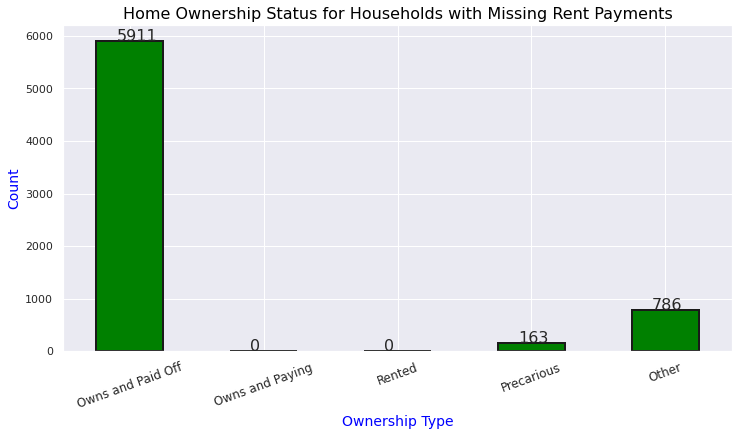

In [14]:
# Variables indicating home ownership
ownnership_variables = ['tipovivi1','tipovivi2','tipovivi3','tipovivi4','tipovivi5']
train_income_df[train_income_df['v2a1'].isnull()][ownnership_variables].sum().plot.bar(figsize = (12, 6),
                        color = 'green',edgecolor = 'k', linewidth = 2,);
plt.xticks([0, 1, 2, 3, 4],['Owns and Paid Off', 'Owns and Paying', 'Rented', 'Precarious', 'Other'],
          rotation = 20,size=12)
plt.xlabel('Ownership Type',size=14,color='blue')
plt.ylabel('Count',size=14,color='blue')
plt.title('Home Ownership Status for Households with Missing Rent Payments', size = 16,color='black');
for index,value in enumerate(v2a1_0):
  plt.text(x=index-0.1, y=value+1 , s=f'{value}',fontdict=dict(fontsize=16))


from the above code it is clear that outof the 6860 rows with 'v2a1' = NaN: 
5911 rows are of own and fully paid house (Means no need to pay rent)
163 rows are precarious type
786 are of other types
There are Zero rows which are both rented house and having rent amount as NaN

i.e we can replace the NaN values of 'v2a1' with '0'(zero)

In [15]:
#Lets add 0 for all the null values of 'v2a1' in both train and test data sets:
for df in [train_income_df, test_income_df]:
    df['v2a1'].fillna(value=0, inplace=True)
    
# Cross-checking for null values in train and test data sets after imputing with '0'
train_income_df[['v2a1']].isnull().sum(),test_income_df[['v2a1']].isnull().sum()

(v2a1    0
 dtype: int64, v2a1    0
 dtype: int64)

**Now Lets look at v18q1: number of tablets household owns**

total nulls: 7342

why the null values, Lets look at value_counts() function of 'v18q1'


In [16]:
v18q1_0=train_income_df['v18q1'].value_counts()
print(v18q1_0)
print('No of rows with atleast one tablet:',train_income_df['v18q1'].value_counts().sum())

1.0    1586
2.0     444
3.0     129
4.0      37
5.0      13
6.0       6
Name: v18q1, dtype: int64
No of rows with atleast one tablet: 2215


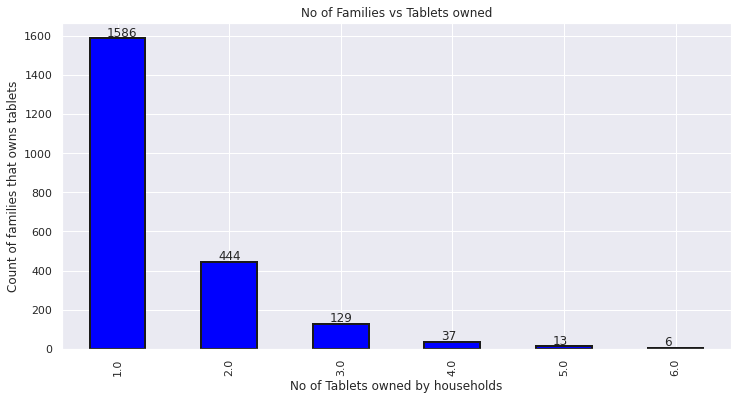

In [17]:
plt.figure(figsize = (12, 6))
col='v18q1'
train_income_df[col].value_counts().sort_index().plot.bar(color = 'blue',
                                             edgecolor = 'k', linewidth = 2)
plt.xlabel('No of Tablets owned by households'); 
plt.title('No of Families vs Tablets owned'); 
plt.ylabel('Count of families that owns tablets')
for index,value in enumerate(v18q1_0):
  plt.text(x=index-0.1, y= value +10, s=f'{value}')

plt.show();

Let us compare v18q1 with 'v18q' which means whether a family owns a tablet or not

In [18]:
train_income_df['v18q'].value_counts()

0    7342
1    2215
Name: v18q, dtype: int64

**From above code it is clear that:**

1.there are 7342 rows where they dont own a tablet

2.There are 2215 rows where they own atleast one tablet

Hence we will replace all null values of 'v18q1' with '0'(zeroes)

In [19]:
#Lets add 0 for all the null values of 'v18q1' in both train and test data sets:
for df in [train_income_df, test_income_df]:
    df['v18q1'].fillna(value=0, inplace=True)

# Cross-checking for null values in train and test data sets after imputing with '0'
train_income_df[['v18q1']].isnull().sum(),test_income_df[['v18q1']].isnull().sum()

(v18q1    0
 dtype: int64, v18q1    0
 dtype: int64)

**Lets look at 'rez_esc' column  : Years behind in school**

total nulls: 7928

why the null values ? Lets check for Columns with high correlation

In [20]:
#Correlation with 'rez_esc' variable
cor = train_income_df.corr()
cor_target = abs(cor['rez_esc'])
print(type(cor_target))
#Selecting highly correlated features
relevant_features = cor_target[cor_target>=0.4]
print(type(cor))
relevant_features

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


rez_esc    1.000000
age        0.443892
SQBage     0.464259
agesq      0.464259
Name: rez_esc, dtype: float64

**From the aboce corr() it is clear that the columns related to 'age' are highly correlated to 'rez_esc'**


In [21]:
train_income_df['rez_esc'].unique()

array([nan,  1.,  0.,  3.,  2.,  4.,  5.])

In [22]:
# Lets look at the 'rez_esc' with not null values and compare it with 'age' column.
train_income_df[train_income_df['rez_esc'].notnull()]['age'].describe()

count    1629.000000
mean       12.258441
std         3.218325
min         7.000000
25%         9.000000
50%        12.000000
75%        15.000000
max        17.000000
Name: age, dtype: float64

**From the above , we see that when min age is 7 and max age is 17 for Years, then the 'behind in school' column has some value.**

In [23]:
# Lets check for Null values for 'rez_esc' where Age is between 7 & 17
train_income_df.loc[(train_income_df['rez_esc'].isnull() & ((train_income_df['age'] > 7) & (train_income_df['age'] < 17)))][['age','rez_esc']]

,age,rez_esc
2514,10,NaN


**There is only 1 record with rez_esc(years behind school)= NaN & Age between 7 & 17 which is very exceptional case.For all other rows with Age between 7 & 17 have some values **

Aboce code explains that 'rez_esc' values are not null if Age is between 7 & 17.
It means that we can impute null values of 'rez_esc' with '0' as it is not applicable to those for whom age is below 7 and above 17

In [24]:
#Let's impute null values of ['rez_esc'] with zero(0)
for df in [train_income_df, test_income_df]:
    df['rez_esc'].fillna(value=0, inplace=True)

#cross_checking for any null values ['rez_esc'] after imputing with '0'
train_income_df[['rez_esc']].isnull().sum(),test_income_df[['rez_esc']].isnull().sum()

(rez_esc    0
 dtype: int64, rez_esc    0
 dtype: int64)

***Lets look at meaneduc : average years of education for adults (18+) ***

---


total nulls: 5 

why the null values, Lets look at few rows with nulls in meaneduc
Columns related to average years of education for adults (18+)

a) instlevel1, =1 no level of education

b) instlevel2, =1 incomplete primary

c) instlevel3, =1 complete primary

d) instlevel4, =1 incomplete academic secondary level

e) instlevel5, =1 complete academic secondary level

f) instlevel6, =1 incomplete technical secondary level

g) instlevel7, =1 complete technical secondary level

h) instlevel8, =1 undergraduate and higher education

i) instlevel9, =1 postgraduate higher education **

In [25]:
data = train_income_df[train_income_df['meaneduc'].isnull()]
columns=['instlevel1','instlevel2','instlevel3','instlevel4','instlevel5','instlevel6','instlevel7','instlevel8','instlevel9','meaneduc','age']
data[columns]


,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,meaneduc,age
1291,0,0,0,1,0,0,0,0,0,NaN,18
1840,0,0,1,0,0,0,0,0,0,NaN,18
1841,0,1,0,0,0,0,0,0,0,NaN,18
2049,0,0,0,0,0,0,1,0,0,NaN,19
2050,0,0,0,0,0,0,1,0,0,NaN,19


From above code it is clear that the null values of 'meaneduc' column are related to one level of education at a time.

from above result first row is related to instlevel4, 2nd row with instlevel3 and so on.
eg: in above row instlevel4 = 1 means incomplete secondary & instlevel1 =0 means some level of education is there.

Hence we will replace the null values of 'meaneduc' column with the mean value of the 'meaneduc' column with corresponding 'instlevel' =1

In [26]:
#Findling the mean mean value of 'meaneduc' with respitve instlevels=1
mean_instlevels = [0]
for col in columns[0:9]:
  mean = train_income_df[train_income_df[col]==1 ]['meaneduc'].mean()
  mean_instlevels.append(mean)
mean_instlevels

[0,
 7.783594793488735,
 6.838546870165747,
 7.526929515171371,
 9.33303845601356,
 11.098791827205194,
 10.127387902923978,
 11.947027855782313,
 13.261946037649691,
 16.24444446938775]

In [27]:
train_income_df['meaneduc'][data[columns].index.to_list()] = [mean_instlevels[4],
                                                              mean_instlevels[3],
                                                              mean_instlevels[2],
                                                              mean_instlevels[7],
                                                              mean_instlevels[7]]

train_income_df['meaneduc'].isnull().sum()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


0

In [28]:
#Dealing with null values of test data for 'meaneduc' column
data2 = test_income_df[test_income_df['meaneduc'].isnull()]
columns=['instlevel1','instlevel2','instlevel3','instlevel4','instlevel5','instlevel6','instlevel7','instlevel8','instlevel9','meaneduc']
print("Null values in test test data for 'meaneduc' column is:",data2[columns].shape[0])
data2[columns].head()

Null values in test test data for 'meaneduc' column is: 31


,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,meaneduc
4,0,0,0,0,1,0,0,0,0,NaN
535,0,0,0,0,1,0,0,0,0,NaN
536,0,0,0,0,0,0,0,1,0,NaN
537,0,0,0,0,0,0,0,1,0,NaN
2612,0,0,0,1,0,0,0,0,0,NaN


In [29]:
#List of instlevels for which meaneduc has null values
columns_list = data2[columns].columns.to_list()[:-1]
index_list = data2[columns].index.to_list()

xxx=[]
for index_no in index_list :
  for col in columns_list:
    if  data2.loc[index_no,col]==1:
      xxx.append(col)
xxx

['instlevel5',
 'instlevel5',
 'instlevel8',
 'instlevel8',
 'instlevel4',
 'instlevel3',
 'instlevel8',
 'instlevel8',
 'instlevel7',
 'instlevel6',
 'instlevel3',
 'instlevel4',
 'instlevel1',
 'instlevel1',
 'instlevel4',
 'instlevel4',
 'instlevel6',
 'instlevel4',
 'instlevel3',
 'instlevel1',
 'instlevel4',
 'instlevel1',
 'instlevel4',
 'instlevel4',
 'instlevel1',
 'instlevel3',
 'instlevel1',
 'instlevel4',
 'instlevel4',
 'instlevel1',
 'instlevel3']

In [30]:
#Extracting the instlevels from the column string for null values imputing
int(str(xxx[0][-1]))
vs =[]
for i in range(len(xxx)):
  x = str(xxx[i][-1])
  vs.append(int(x))
print(*vs, sep = ", ")

5, 5, 8, 8, 4, 3, 8, 8, 7, 6, 3, 4, 1, 1, 4, 4, 6, 4, 3, 1, 4, 1, 4, 4, 1, 3, 1, 4, 4, 1, 3


In [31]:
#creating a lsit of mean values of 'meaneduc' columns with corresponding instlevel =1 rows
mean_instlevels_test = [0]
for col in columns[0:9]:
  test_mean = test_income_df[test_income_df[col]==1 ]['meaneduc'].mean()
  mean_instlevels_test.append(test_mean)
mean_instlevels_test                                                           

[0,
 7.5870416333268995,
 6.785467820820893,
 7.545156740999817,
 9.21232675857209,
 10.96539430193309,
 9.932742301654848,
 11.568838375151513,
 13.326370714352441,
 15.887814691842905]

In [32]:
#Imputing null values with mean of corresponding instlevel =1 rows
test_income_df['meaneduc'][index_list] = [mean_instlevels_test[i] for i in vs]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [33]:
test_income_df['meaneduc'].isnull().sum()

0

**Lets look at SQBmeaned : square of the mean years of education of adults (>=18) in the household ** 
total nulls: 5
Lets Check the Null valueed rows are same as that of meaneduc column

In [34]:
train_income_df[train_income_df['SQBmeaned'].isnull()].index

Int64Index([1291, 1840, 1841, 2049, 2050], dtype='int64')

From above code it is clear that the missing values are of same rows for both 'meaneduc' & 'SQBmeaned' columns
Also 'SQBmeaned' column is square of 'meaneduc' column we may drop the column 'SQBmeaned'

# **Check whether all members of the house have the same poverty level.**
Lets look into target variable

In [35]:
# Groupby the household and figure out the number of unique values
all_equal = train_income_df.groupby('idhogar')['Target'].apply(lambda x: x.nunique() == 1)

# Households where targets are not all equal
not_equal = all_equal[all_equal != True]
print('There are {} households where the family members do not all have the same poverty level.'.format(len(not_equal)))

There are 85 households where the family members do not all have the same poverty level.


In [36]:
print('The list of households Unique IDs where all family members do not have same poverty level is as below:')
not_equal.index.to_list()

The list of households Unique IDs where all family members do not have same poverty level is as below:


['0172ab1d9',
 '03f4e5f4d',
 '0511912b6',
 '078a0b6e2',
 '09e25d616',
 '0f3e65c83',
 '0f9494d3a',
 '15a891635',
 '17fb04a62',
 '18832b840',
 '26b3a0f41',
 '288579c97',
 '28893b5e7',
 '2c9872b82',
 '2cb443214',
 '309fb7246',
 '30a70901d',
 '3c6973219',
 '3c73c107f',
 '3df651058',
 '3fe29a56b',
 '410194c8b',
 '417865404',
 '42ec8bef5',
 '43b9c83e5',
 '44f219a16',
 '46af47063',
 '4b6077882',
 '4c2dba109',
 '4dc11e11f',
 '4e19bd549',
 '50e064ee8',
 '513adb616',
 '54118d5d9',
 '55a662731',
 '564eab113',
 '594d3eb27',
 '5c3f7725d',
 '5c6f32bbc',
 '5e9329fc6',
 '614b48fb7',
 '636330516',
 '654ef7612',
 '67ad49822',
 '6833ac5dc',
 '694a0cbf4',
 '6a389f3de',
 '6bcf799cf',
 '6c543442a',
 '71cd52a80',
 '73d85d05d',
 '7ad269eef',
 '7c57f8237',
 '7e9d58c5c',
 '7ea6aca15',
 '80a66379b',
 '811a35744',
 '8242a51ec',
 '8420bcfca',
 '8ae3e74ca',
 '8bb6da3c1',
 '932287f5d',
 '9bbf7c6ca',
 'a20ff33ba',
 'a3288e6fa',
 'a94a45642',
 'bcaa2e2f5',
 'bcab69521',
 'bd82509d1',
 'be91da044',
 'c13325faf',
 'c389

In [37]:
#Lets see data of any one household
train_income_df[train_income_df['idhogar'] == not_equal.index[0]][['idhogar', 'parentesco1','Target']]

,idhogar,parentesco1,Target
7651,0172ab1d9,0,3
7652,0172ab1d9,0,2
7653,0172ab1d9,0,3
7654,0172ab1d9,1,3
7655,0172ab1d9,0,2


# **Check if there is a house without a family head.**

In [38]:
#Lets use Target value of the parent record (head of the household) and update rest. 
#But before that lets check, if all families has a head. 

households_head = train_income_df.groupby('idhogar')['parentesco1'].sum()
households_head
# # Find households without a head
households_with_no_head = train_income_df.loc[train_income_df['idhogar'].isin(households_head[households_head == 0].index), :]

print('There are {} households without a head.'.format(households_with_no_head['idhogar'].nunique()))

There are 15 households without a head.


In [39]:
# Find households without a head and where Target value are different
households_with_no_head_equal = households_with_no_head.groupby('idhogar')['Target'].apply(lambda x: x.nunique() == 1)
print('No of Households with no head and have different Target values are:{}'.format(sum(households_with_no_head_equal == False)))

No of Households with no head and have different Target values are:0


***# Code for Dropping the features which are correalted to each other***

Lets look at the Squared Variables
‘SQBescolari’
‘SQBage’
‘SQBhogar_total’
‘SQBedjefe’
‘SQBhogar_nin’
‘SQBovercrowding’
‘SQBdependency’
‘SQBmeaned’
‘agesq’ and delete them

In [40]:
print('Shape of train dataset before dropping Squared valued features: ',train_income_df.shape)
cols=['SQBescolari', 'SQBage', 'SQBhogar_total', 'SQBedjefe', 
        'SQBhogar_nin', 'SQBovercrowding', 'SQBdependency', 'SQBmeaned', 'agesq']
for df in [train_income_df, test_income_df]:
    df.drop(columns = cols,inplace=True)

print('Shape of train dataset after dropping Squared valued features: ',train_income_df.shape)


Shape of train dataset before dropping Squared valued features:  (9557, 143)
Shape of train dataset after dropping Squared valued features:  (9557, 134)


#Checking for any Bias in dataset

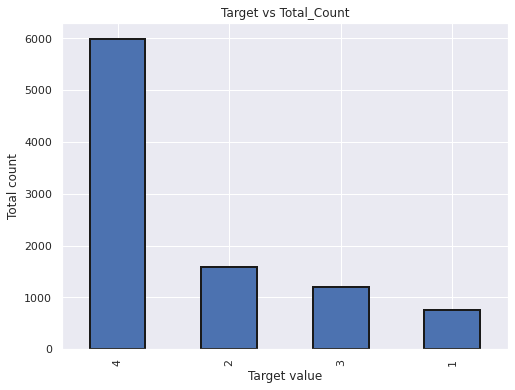

In [41]:
#train_income_df1['Target'].value_counts(1)*100
train_income_df['Target'].value_counts().plot.bar(figsize = (8, 6),
                                                   linewidth = 2,
                                                   edgecolor = 'k',
                                                   title="Target vs Total_Count",
                                                   xlabel = 'Target value',
                                                   ylabel='Total count');

From the above bar chart it is clear that there is bias in dataset as Target value 4 has highest count of around 6000(approx 65%) where as Target value 1 has only around 800(approx 8%).Hence the data is heavily biased towards target value-4(unvulnerable households). i,e as per data extreme low level povery is very low percentage.

In [42]:
# Create correlation matrix
corr_matrix_train = train_income_df.corr().abs()
corr_matrix_test = test_income_df.corr().abs()

# Select upper triangle of correlation matrix
upper_train = corr_matrix_train.where(np.triu(np.ones(corr_matrix_train.shape),k=1).astype(bool))
upper_test = corr_matrix_test.where(np.triu(np.ones(corr_matrix_test.shape),k=1).astype(bool))

# Find features with correlation greater than 0.95
to_drop = [column for column in upper_train.columns if any(upper_train[column] > 0.95)]

In [43]:
to_drop

['tamhog', 'hhsize', 'coopele', 'female', 'hogar_total', 'area2']

In [44]:
train_income_df.drop('Id',axis=1,inplace=True)

In [45]:
train_income_df2 = train_income_df.set_index('idhogar')
train_income_df2.head()

,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,...,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,Target
idhogar,,,,,,,,,,,,,,,,,,,,,
21eb7fcc1,190000.0,0,3,0,1,1,0,0.0,0,1,...,1,0,0,0,0,0,1,0,43,4
0e5d7a658,135000.0,0,4,0,1,1,1,1.0,0,1,...,1,0,0,0,0,0,1,0,67,4
2c7317ea8,0.0,0,8,0,1,1,0,0.0,0,0,...,1,0,0,0,0,0,1,0,92,4
2b58d945f,180000.0,0,5,0,1,1,1,1.0,0,2,...,1,0,0,0,0,0,1,0,17,4
2b58d945f,180000.0,0,5,0,1,1,1,1.0,0,2,...,1,0,0,0,0,0,1,0,37,4


In [46]:
# Drop features with higher correlation
train_income_df2=train_income_df2.drop(to_drop, axis=1)
print(train_income_df2.shape)

test_income_df1=test_income_df.drop(to_drop, axis=1)
print(test_income_df1.shape)

(9557, 126)
(23856, 127)


In [47]:
X= train_income_df2.drop('Target',axis=1)
y= train_income_df2['Target']

In [48]:
X.shape

(9557, 125)

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

#Train a Random Forest Classifier & Predict

In [50]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state =101)
rf.fit(X_train, y_train)
y_pred_train_rf = rf.predict(X_train)
y_pred_test_rf = rf.predict(X_test)



# Evaluate Model Prediction Accuracy on Train & Test Predictions

In [51]:
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,classification_report
acc_train_rf = accuracy_score(y_train, y_pred_train_rf)
acc_test_rf = accuracy_score(y_test, y_pred_test_rf)
print('accuracy score of train data is:',acc_train_rf)
print('accuracy score of test data set is:',acc_test_rf)
print(confusion_matrix(y_test,y_pred_test_rf))
print(classification_report(y_test,y_pred_test_rf))

accuracy score of train data is: 1.0
accuracy score of test data set is: 0.9194560669456067
[[ 120   10    0   22]
 [   6  285    6   36]
 [   1    8  203   56]
 [   1    6    2 1150]]
              precision    recall  f1-score   support

           1       0.94      0.79      0.86       152
           2       0.92      0.86      0.89       333
           3       0.96      0.76      0.85       268
           4       0.91      0.99      0.95      1159

    accuracy                           0.92      1912
   macro avg       0.93      0.85      0.89      1912
weighted avg       0.92      0.92      0.92      1912



# Hyper parameter tuning of Random forest by GridSearcCV

In [52]:
# create the parameter grid dictionary for C & gamma values
param_grid = {'n_estimators': [20,50,100,150,200], 'max_depth': [5,8,12,16,20]}

In [53]:
# import GridSearchCV from Sklearn
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(rf, param_grid=param_grid, cv=10)
grid.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=101),
             param_grid={'max_depth': [5, 8, 12, 16, 20],
                         'n_estimators': [20, 50, 100, 150, 200]})

In [54]:
#Best estimator with best features
grid.best_estimator_

RandomForestClassifier(max_depth=20, n_estimators=200, random_state=101)

In [55]:
#training a RFC model with best parameters from GridSearchCV
from sklearn.ensemble import RandomForestClassifier
rf1 = RandomForestClassifier(max_depth=20, n_estimators=200, random_state=101)

rf1.fit(X_train, y_train)
y_pred_train_rf1 = rf1.predict(X_train)
y_pred_test_rf1 = rf1.predict(X_test)

In [56]:
acc_train_rf1 = accuracy_score(y_train, y_pred_train_rf1)
acc_test_rf1 = accuracy_score(y_test, y_pred_test_rf1)
print('Accuracy score of train data:', acc_train_rf1.round(2))
print('Accuracy score on predicted data:', acc_test_rf1.round(2))

Accuracy score of train data: 1.0
Accuracy score on predicted data: 0.91


### Cross Validation on Random Forest with KFold*

In [57]:
from sklearn.model_selection import KFold,cross_val_score
kfold=KFold(n_splits=5,random_state=101,shuffle=True)

score_rf=cross_val_score(rf1,X_train,y_train,cv=kfold,scoring='accuracy')
print(score_rf)
print("Avg score of rf1 on train data with cross validation:",np.average(score_rf).round(2))

score_rf1=cross_val_score(rf1,X_test,y_test,cv=kfold,scoring='accuracy')
print(score_rf1)
print("Avg score of rf1 on test data with cross validation:",np.average(score_rf1).round(2))

[0.89274035 0.89862655 0.90385873 0.90974493 0.8999346 ]
Avg score of rf1 on train data with cross validation: 0.9
[0.73629243 0.74412533 0.78272251 0.7513089  0.73560209]
Avg score of rf1 on test data with cross validation: 0.75


In [58]:
labels = list(X_train)
feature_imp_df = pd.DataFrame({'feature': labels, 'importance': rf1.feature_importances_})
feature_imp_df = feature_imp_df[feature_imp_df.importance>0.015]
feature_imp_df.head()


,feature,importance
0,v2a1,0.018226
2,rooms,0.024281
9,r4h2,0.019797
10,r4h3,0.019704
11,r4m1,0.015112


In [59]:
#predecting top 5 important features
feature_imp_df.sort_values(by=['importance'], ascending=False, inplace=True)
feature_imp_df.set_index('feature',inplace=True)
feature_imp_df.head()

,importance
feature,
meaneduc,0.068492
dependency,0.045469
overcrowding,0.036401
hogar_nin,0.031442
edjefe,0.030251


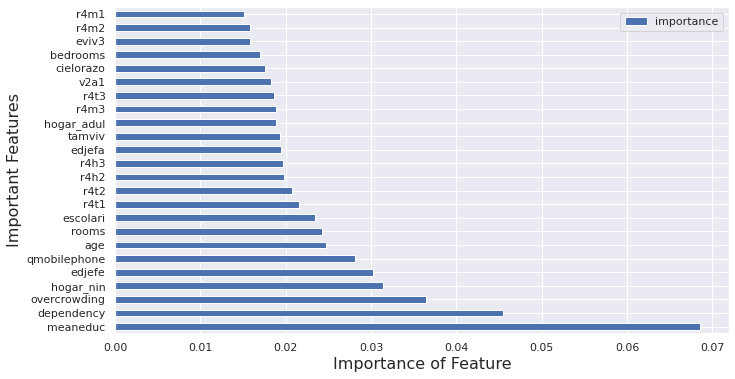

In [60]:
feature_imp_df.plot(kind='barh',figsize=(11, 6));
plt.xlabel('Importance of Feature',size=16)
plt.ylabel('Important Features',size=16)
plt.show()

# **Predicting the Target values for test.csv (test_income_df)**

In [61]:
test_income_df.drop('Id',axis=1,inplace=True)
test_income_df.head()


,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,...,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age
0,0.0,0,5,0,1,1,0,0.0,1,1,...,2,1,0,0,0,0,0,1,0,4
1,0.0,0,5,0,1,1,0,0.0,1,1,...,2,1,0,0,0,0,0,1,0,41
2,0.0,0,5,0,1,1,0,0.0,1,1,...,2,1,0,0,0,0,0,1,0,41
3,0.0,0,14,0,1,1,1,1.0,0,1,...,2,1,0,0,0,0,0,1,0,59
4,175000.0,0,4,0,1,1,1,1.0,0,0,...,1,1,0,0,0,0,0,1,0,18


In [62]:
test_income_df1=test_income_df.set_index('idhogar')
test_income_df1.shape,X_train.shape

((23856, 131), (7645, 125))

In [63]:
test_income_df1.drop(to_drop,axis=1,inplace=True)

In [64]:
test_income_df1.shape,X_train.shape

((23856, 125), (7645, 125))

In [65]:
y_pred_test_rf1 = rf1.predict(test_income_df1)

In [66]:
test_income_df1['Target'] = y_pred_test_rf1

In [67]:
test_income_df1.head()

,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,...,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,age,Target
idhogar,,,,,,,,,,,,,,,,,,,,,
72958b30c,0.0,0,5,0,1,1,0,0.0,1,1,...,2,1,0,0,0,0,0,1,4,4
72958b30c,0.0,0,5,0,1,1,0,0.0,1,1,...,2,1,0,0,0,0,0,1,41,4
72958b30c,0.0,0,5,0,1,1,0,0.0,1,1,...,2,1,0,0,0,0,0,1,41,4
5b598fbc9,0.0,0,14,0,1,1,1,1.0,0,1,...,2,1,0,0,0,0,0,1,59,4
1e2fc704e,175000.0,0,4,0,1,1,1,1.0,0,0,...,1,1,0,0,0,0,0,1,18,4


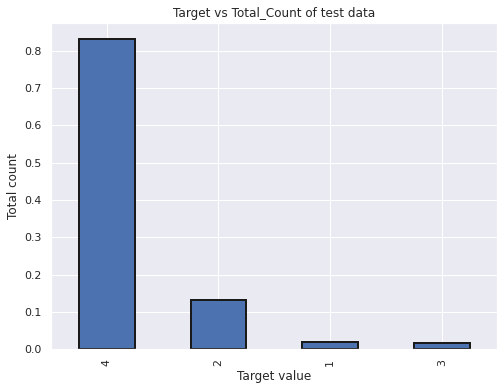

In [68]:
test_income_df1['Target'].value_counts(1).plot.bar(figsize = (8, 6),
                                                   linewidth = 2,
                                                   edgecolor = 'k',
                                                   title="Target vs Total_Count of test data",
                                                   xlabel = 'Target value',
                                                   ylabel='Total count');

As there is bias towards target value-4 in train data set(66 %), the test data set also biased even more biased towards target value-4 (86%)

In [69]:
test_income_df1.to_csv('test-df_with_target.csv')